Playing with Fourier Transforms

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Lensing as sl
import astropy.units as u
import astropy.constants as const
from astropy.cosmology import Planck18
from astropy.cosmology import WMAP9
from scipy.fft import fft, ifft, fftfreq, fftshift, fft2, ifft2, ifftshift

In [2]:
# Lens Parameters
sigma_v = 1400*u.km/u.s # velocity dispersion

In [3]:
# Distance Parameters
zlens = 0.3 # redshift of the lens
zsource = 1.0 # redshift of the source

dL = Planck18.angular_diameter_distance(zlens) # distance from the viewer to the lens plane
dS = Planck18.angular_diameter_distance(zsource) # distance from the viewer to the source plane
dLS = Planck18.angular_diameter_distance_z1z2(zlens, zsource) # distance from the lens plane to the source

In [4]:
def Sigma_crit(dS, dLS, dL):
    return const.c**2/(4*np.pi*const.G) * dS/(dL*dLS)

In [5]:
# Making a coordinate grid to represent each point in space
n = 450

x0 = np.linspace(-60, 60, n)*u.arcsec
y0 = np.linspace(-60, 60, n)*u.arcsec

## combining to get a full cartesian coordinate grid ranging from (-1,-1) to (1,1)
x, y = np.meshgrid(x0,y0)

In [6]:
rgrid = np.sqrt(x**2 + y**2)
rgrid = (rgrid.to_value('arcsec'))*dL
rgrid

<Quantity [[80460.48402851, 80281.48473119, 80102.8872185 , ...,
            80102.8872185 , 80281.48473119, 80460.48402851],
           [80281.48473119, 80102.08543595, 79923.08703549, ...,
            79923.08703549, 80102.08543595, 80281.48473119],
           [80102.8872185 , 79923.08703549, 79743.6868434 , ...,
            79743.6868434 , 79923.08703549, 80102.8872185 ],
           ...,
           [80102.8872185 , 79923.08703549, 79743.6868434 , ...,
            79743.6868434 , 79923.08703549, 80102.8872185 ],
           [80281.48473119, 80102.08543595, 79923.08703549, ...,
            79923.08703549, 80102.08543595, 80281.48473119],
           [80460.48402851, 80281.48473119, 80102.8872185 , ...,
            80102.8872185 , 80281.48473119, 80460.48402851]] Mpc>

In [7]:
Sigma = sigma_v**2/(2*const.G*rgrid)
sigma_crit = Sigma_crit(dS, dLS, dL)
print(sigma_crit.decompose())
print(Sigma.decompose())

5.749602102137826 kg / m2
[[5.91407961e-06 5.92726591e-06 5.94048135e-06 ... 5.94048135e-06
  5.92726591e-06 5.91407961e-06]
 [5.92726591e-06 5.94054081e-06 5.95384544e-06 ... 5.95384544e-06
  5.94054081e-06 5.92726591e-06]
 [5.94048135e-06 5.95384544e-06 5.96723987e-06 ... 5.96723987e-06
  5.95384544e-06 5.94048135e-06]
 ...
 [5.94048135e-06 5.95384544e-06 5.96723987e-06 ... 5.96723987e-06
  5.95384544e-06 5.94048135e-06]
 [5.92726591e-06 5.94054081e-06 5.95384544e-06 ... 5.95384544e-06
  5.94054081e-06 5.92726591e-06]
 [5.91407961e-06 5.92726591e-06 5.94048135e-06 ... 5.94048135e-06
  5.92726591e-06 5.91407961e-06]] kg / m2


In [8]:
convergence = Sigma/sigma_crit
convergence = convergence.decompose()

In [9]:
# next, i need to do operation with the fourier series to get the shear's x and y components. See my notes and use 
# wikipedia article on the fourier transformation (eventually will use scipy.fft) to do this.

In [10]:
convergence_ft = fft(convergence)
# kx = fftfreq

In [11]:
shear_ftx = 
shear_fty = 

shear_x = ifft(shear_ftx)
shear_y = ifft(shear_fty)

SyntaxError: invalid syntax (1757309937.py, line 1)

Playing with FFT

In [11]:
import Strong_Lensing as sl

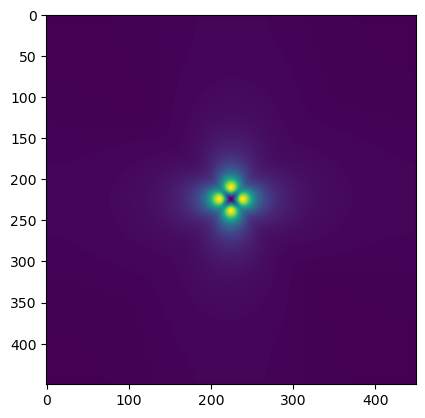

In [172]:
plt.imshow(calculate_shear(convergence, n, edgex, edgey))

In [197]:
def calculate_shear(convergence, n, edgex, edgey):
    convergence_ft = fft2(convergence)
    
    kx = fftfreq(n, 2*edgex/n)
    ky = fftfreq(n, 2*edgey/n)

    kx,ky = np.meshgrid(kx, ky)
    
    kx[0, 0] = 1
    ky[0, 0] = 1

    shear1_ft = (kx**2 - ky**2)/(kx**2 + ky**2) * convergence_ft
    shear2_ft = (2*kx*ky)/(kx**2 + ky**2) * convergence_ft

    shear1_tf[0, 0] = 0
    shear2_tf[0, 0] = 0
    
    shear1 = np.real(ifft2(shear1_ft))
    shear2 = np.real(ifft2(shear2_ft))
    
    return shear1, shear2, np.sqrt(shear1**2 + shear2**2)

In [200]:
# Making a coordinate grid to represent each point in space
n = 450
edgex = 100
edgey = 100

x0 = np.linspace(-edgex, edgex, n)*u.arcsec
y0 = np.linspace(-edgey, edgey, n)*u.arcsec

## combining to get a full cartesian coordinate grid ranging from (-1,-1) to (1,1)
x, y = np.meshgrid(x0,y0)

In [ ]:
def SIS_convergence(x,y,theta_E):
    theta = np.sqrt(x**2 + y**2)
    kappa = 0.5*(theta/theta_E)**-1
    return kappa

def SIS_shear

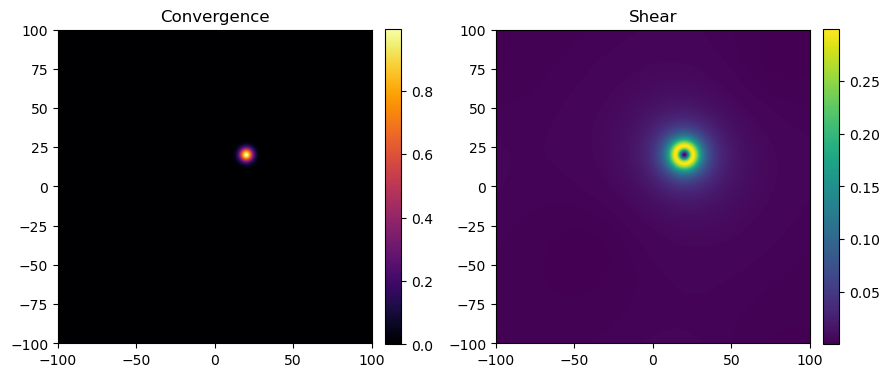

In [207]:
intensity_unlensed = sl.gaussian_source_intensity_rot(beta_x = x, beta_y = y, rs = 3*u.arcsec, source_x = 20*u.arcsec, source_y = 20*u.arcsec)
convergence = intensity_unlensed.to_value(u.W/(u.arcsec)**2)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9,9))

convergence_plot = ax1.imshow(convergence, origin = 'lower', extent = [-edgex, edgex, -edgey, edgey])
ax1.set_title('Convergence')
plt.colorbar(convergence_plot,fraction=0.046, pad=0.04)
convergence_plot.set_cmap('inferno')

shear1, shear2, shear = calculate_shear(convergence, n, edgex, edgey)
shear_plot = ax2.imshow(shear, origin = 'lower', extent = [-edgex, edgex, -edgey, edgey])
ax2.set_title('Shear')
plt.colorbar(shear_plot,fraction=0.046, pad=0.04)
shear_plot.set_cmap('viridis')

plt.tight_layout()

[[-1.125 -1.125 -1.125 ... -1.125 -1.125 -1.125]
 [-1.12  -1.12  -1.12  ... -1.12  -1.12  -1.12 ]
 [-1.115 -1.115 -1.115 ... -1.115 -1.115 -1.115]
 ...
 [ 1.11   1.11   1.11  ...  1.11   1.11   1.11 ]
 [ 1.115  1.115  1.115 ...  1.115  1.115  1.115]
 [ 1.12   1.12   1.12  ...  1.12   1.12   1.12 ]]
[[-1.125 -1.12  -1.115 ...  1.11   1.115  1.12 ]
 [-1.125 -1.12  -1.115 ...  1.11   1.115  1.12 ]
 [-1.125 -1.12  -1.115 ...  1.11   1.115  1.12 ]
 ...
 [-1.125 -1.12  -1.115 ...  1.11   1.115  1.12 ]
 [-1.125 -1.12  -1.115 ...  1.11   1.115  1.12 ]
 [-1.125 -1.12  -1.115 ...  1.11   1.115  1.12 ]]


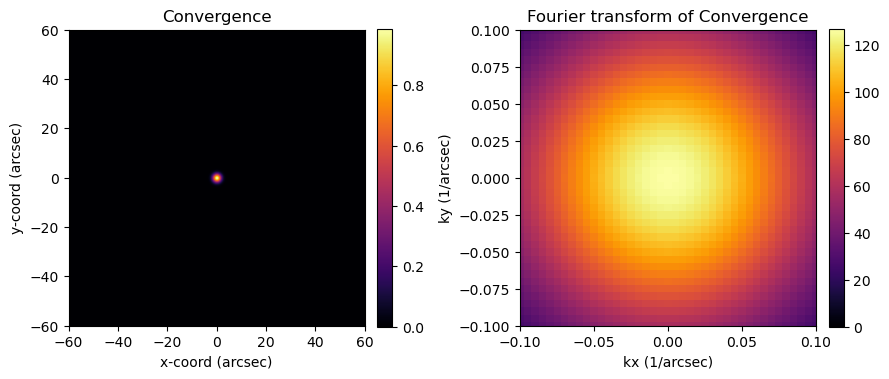

In [191]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9,9))

# convergence (unitless for sake of exercise) = gaussian distribution
intensity_unlensed = sl.gaussian_source_intensity_rot(beta_x = x, beta_y = y, rs = 2*u.arcsec)
convergence = intensity_unlensed.to_value(u.W/(u.arcsec)**2)

convergence_plot = ax1.imshow(convergence, origin = 'lower', extent = [-60,60,-60,60])

# plot the "convergence" (not actually convergence)
ax1.set_title('Convergence')
ax1.set(xlabel='x-coord (arcsec)', ylabel='y-coord (arcsec)')
plt.colorbar(convergence_plot,fraction=0.046, pad=0.04)
convergence_plot.set_cmap('inferno')

# take the fourier transofrm of convergence
#convergence_ft = np.fft.ifftshift(convergence)
convergence_ft = fftshift(fft2(convergence))

# extract values of kx and ky
kx = fftfreq(n, 2*edgex/n)
ky = fftfreq(n, 2*edgey/n)

kx = fftshift(kx)
ky = fftshift(ky)

#print(kx)
kx,ky = np.meshgrid(kx, ky, indexing='ij')

# plot the fourier transform of the convergence
convergence_ft_plot = ax2.imshow(abs(convergence_ft), origin = 'lower', extent = [kx.min(),kx.max(),ky.min(),ky.max()])
ax2.set(xlabel='kx (1/arcsec)', ylabel='ky (1/arcsec)')
ax2.set(title = 'Fourier transform of Convergence')
ax2.set_xlim(-0.1,0.1)
ax2.set_ylim(-0.1,0.1)
plt.colorbar(convergence_ft_plot,fraction=0.046, pad=0.04)
convergence_ft_plot.set_cmap('inferno')

plt.tight_layout()
print(kx)
print(ky)

In [139]:
kx[n//2,n//2]

0.0

In [140]:
#5 * (1 + 1j)

kx[n//2, n//2] = 1
ky[n//2, n//2] = 1

shear1_tf = (kx**2 - ky**2)/(kx**2 + ky**2) * convergence_tf
shear2_tf = (kx*ky)/(kx**2 + ky**2) * convergence_tf

shear1_tf[n//2, n//2] = 0
shear2_tf[n//2, n//2] = 0

In [141]:
shear1 = ifft2(ifftshift(shear1_tf))
shear2 = ifft2(ifftshift(shear2_tf))

shear1 = np.real(shear1)
shear2 = np.real(shear2)

shear1**2 + shear2**2

array([[1.64221944e-05, 1.74619586e-05, 1.88605252e-05, ...,
        1.88605252e-05, 1.74619586e-05, 1.64221944e-05],
       [7.21734036e-06, 8.03954728e-06, 9.19702550e-06, ...,
        9.23736042e-06, 8.06463027e-06, 7.22608807e-06],
       [6.29227103e-07, 8.15523975e-07, 1.04251146e-06, ...,
        8.21756635e-07, 6.77369141e-07, 5.80147275e-07],
       ...,
       [8.39779410e-09, 1.06014288e-08, 1.29078680e-08, ...,
        2.42984081e-08, 1.78370648e-08, 1.11622130e-08],
       [5.80147275e-07, 6.77369141e-07, 8.21756635e-07, ...,
        1.04251146e-06, 8.15523975e-07, 6.29227103e-07],
       [7.22608807e-06, 8.06463027e-06, 9.23736042e-06, ...,
        9.19702550e-06, 8.03954728e-06, 7.21734036e-06]])

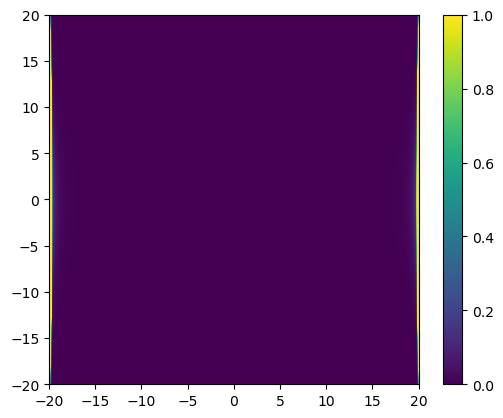

In [142]:
plt.imshow(np.sqrt(np.abs(shear1_tf)**2 + np.abs(shear2_tf)**2), origin = 'lower', extent = [-20,20,-20,20],vmin=0,vmax=1)
# plt.xlim(-5, 5)
# plt.ylim(-5,5)
plt.colorbar()

In [143]:
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
x

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [77]:
y = fft(x)
y

array([ 4.5       -0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

In [78]:
ifft(y)

array([ 1. +0.j,  2. +0.j,  1. +0.j, -1. +0.j,  1.5+0.j])

In [372]:
#x

In [267]:
W = 12
N = 480
x = np.linspace(0,W,N+1)[:-1]
Lambda = 2
d = W/N
phi = np.pi/6

In [305]:
f = np.sin(2*np.pi*x/Lambda) + np.sin(2*np.pi*x/(2*Lambda))

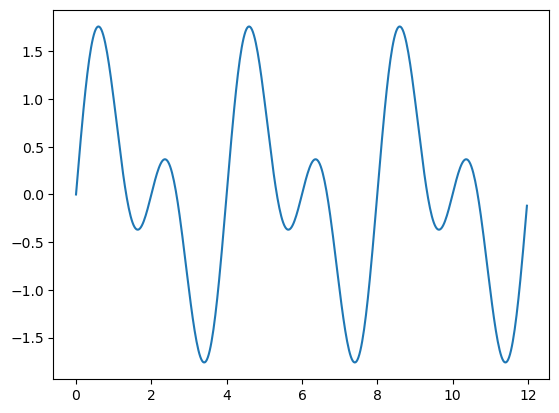

In [306]:
plt.plot(x,f)

In [344]:
ff = fft(f)
k = fftfreq(N, d)

(-1.0, 1.0)

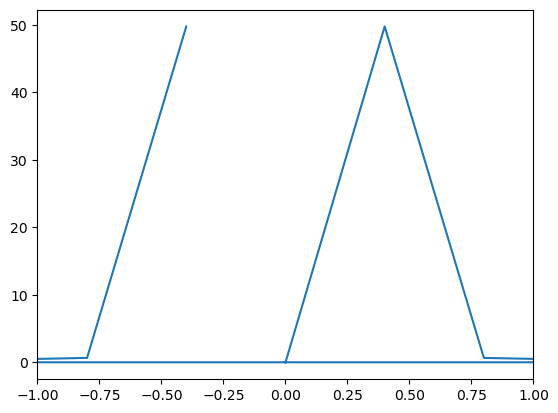

In [346]:
plt.plot(k,np.abs(ff))
plt.xlim(-1,1)

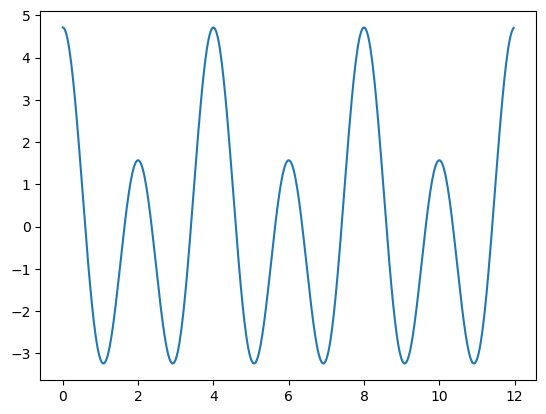

In [309]:
plt.plot(x,ifft(i*2*np.pi*ff*k))

In [301]:
i=0+1j

In [371]:
#ifft(i*ff*k)

In [221]:
k

array([ 0.        ,  0.08333333,  0.16666667,  0.25      ,  0.33333333,
        0.41666667,  0.5       ,  0.58333333,  0.66666667,  0.75      ,
        0.83333333,  0.91666667,  1.        ,  1.08333333,  1.16666667,
        1.25      ,  1.33333333,  1.41666667,  1.5       ,  1.58333333,
        1.66666667,  1.75      ,  1.83333333,  1.91666667, -2.        ,
       -1.91666667, -1.83333333, -1.75      , -1.66666667, -1.58333333,
       -1.5       , -1.41666667, -1.33333333, -1.25      , -1.16666667,
       -1.08333333, -1.        , -0.91666667, -0.83333333, -0.75      ,
       -0.66666667, -0.58333333, -0.5       , -0.41666667, -0.33333333,
       -0.25      , -0.16666667, -0.08333333])

In [222]:
k[2]

0.16666666666666666

In [223]:
k[2]

0.16666666666666666

In [224]:
ff[3].imag

-17.67954195657307

In [225]:
ff[3].real

15.801325815753422

Text(0.5, 1.0, 'Original Signal')

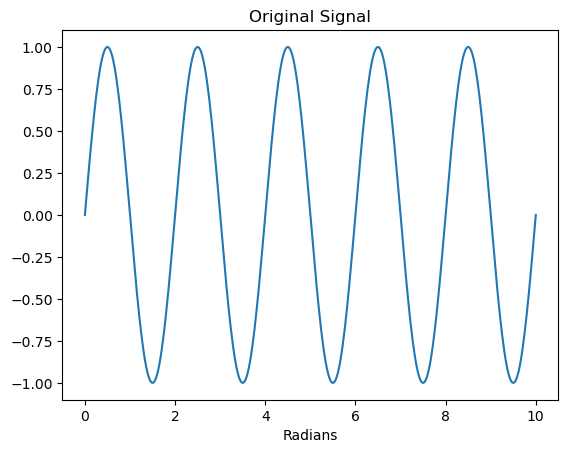

In [395]:
N = 400
T = 10
Lambda = 1

x = np.linspace(0,T,N)
f = np.sin(np.pi*x/Lambda)
plt.plot(x,f)
plt.xlabel('Radians')
plt.title('Original Signal')

Text(0.5, 1.0, 'Fourier Series of Original Signal')

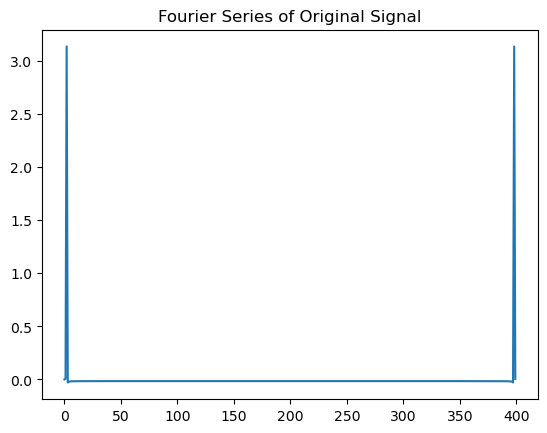

In [387]:
ff = fft(f)

plt.plot(ff)
plt.title('Fourier Series of Original Signal')

Text(0, 0.5, 'k')

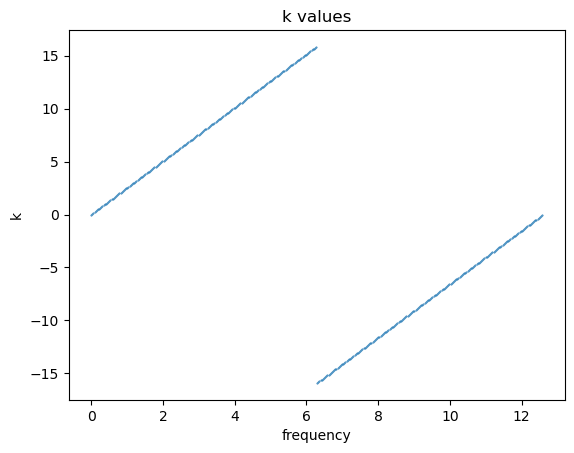

In [388]:
k = fftfreq(N, T/N)
plt.scatter(x, k, s = 0.2)
plt.title('k values')
plt.xlabel('frequency')
plt.ylabel('k')

(-0.4, 0.4)

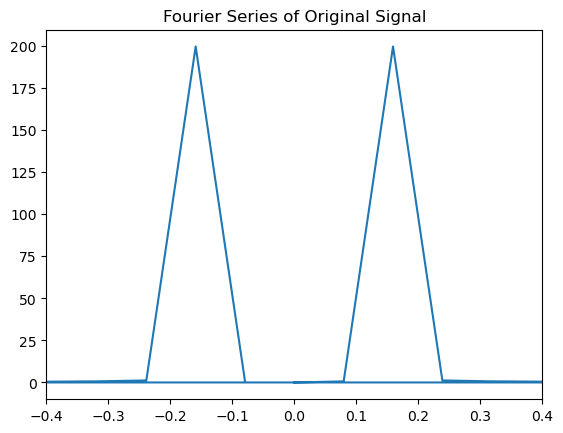

In [389]:
plt.plot(k, np.abs(ff))
plt.title('Fourier Series of Original Signal')
plt.xlim(-0.4,0.4)

In [409]:
#k

n = [0.  0.5 1.  1.5]
x_s = [ 0.0000000e+00  1.0000000e+00  1.2246468e-16 -1.0000000e+00]
y = [1.2246468e-16 2.0000000e+00 1.2246468e-16 2.0000000e+00]
k_s = [ 0.   0.5 -1.  -0.5]
4


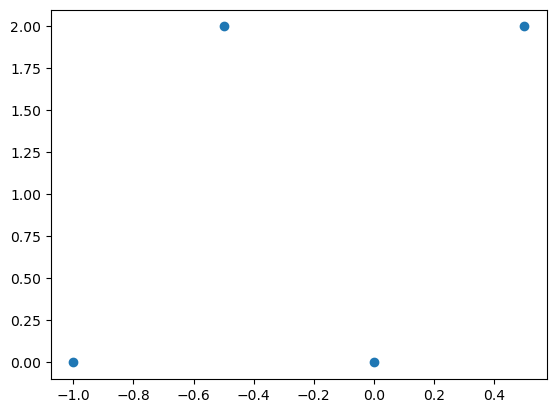

In [468]:
N = 4
T = 2
W = T/N

n = np.linspace(0,T,N, endpoint=False)
x_s = np.sin(np.pi*n)
y = fft(x_s)

k_s = fftfreq(N, W)

print('n = ' + str(n))
print('x_s = ' + str(x_s))
print('y = ' + str(np.absolute(y)))
print('k_s = ' + str(k_s))

print(len(y))

plt.scatter(fftfreq(N,W), np.absolute(y))
#plt.xlim(-2,2)

array([0. , 0.5, 1. , 1.5])

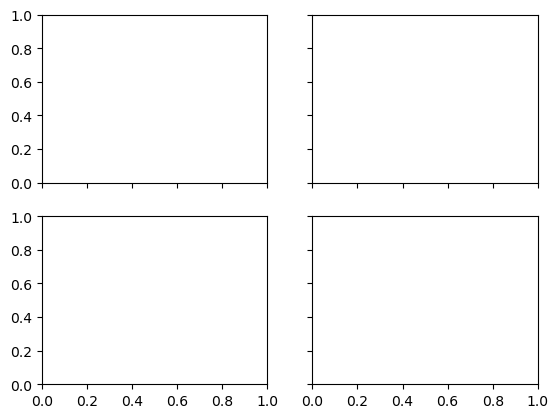

In [472]:
N = 4
T = 2

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')

nx = np.linspace(0,T,N, endpoint=False)
ny = np.linspace(0,T,N, endpoint = False)

x_s = np.sin(np.pi*(nx + ny))



False

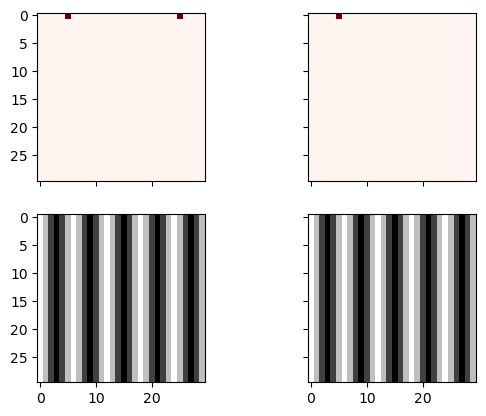

In [474]:
from scipy.fft import ifftn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
N = 30
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
xf = np.zeros((N,N))
xf[0, 5] = 1
xf[0, N-5] = 1
Z1 = ifftn(xf)
ax1.imshow(xf, cmap=cm.Reds)
ax3.imshow(np.real(Z1), cmap=cm.gray)
#print(Z1)


xf = np.zeros((N, N))
xf[0, 5] = 1
#xf[N-5, 0] = 1
Z2 = ifftn(xf)
ax2.imshow(xf, cmap=cm.Reds)
ax4.imshow(np.real(Z2), cmap=cm.gray)
# print(Z2-Z1)

np.array_equiv(Z1, Z2) 
# xf = np.zeros((N, N))
# xf[5, 10] = 1
# xf[N-5, N-10] = 1
# Z = ifftn(xf)
# ax3.imshow(xf, cmap=cm.Reds)
# ax6.imshow(np.real(Z), cmap=cm.gray)
# plt.show()

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq, fftshift

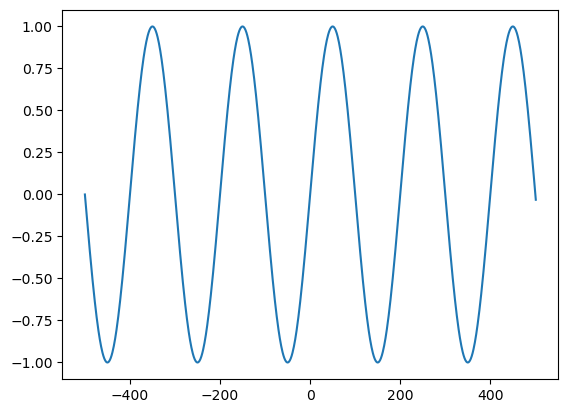

In [94]:
x = np.linspace(-500,501,1000)
wavelength = 200
y = np.sin(2 * np.pi * x / wavelength)
plt.plot(x, y)
plt.show()

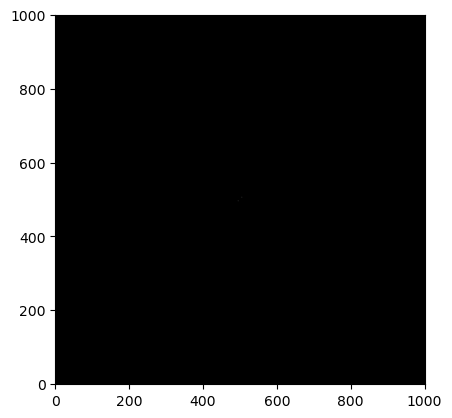

In [95]:
# gratings.py

x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)

wavelength = 200
grating = np.sin(2 * np.pi * (X + Y) / wavelength)

#ft_grating = np.fft.fft2(grating)

ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

#print(ft_grating)

plt.set_cmap("gray")
plt.imshow(abs(ft), origin='lower')
plt.show()

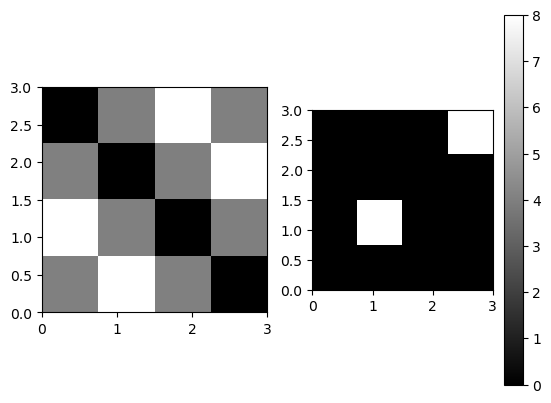

In [96]:
# gratings.py

import numpy as np
import matplotlib.pyplot as plt

W =4
S = 0
E = 2
spacing = (E-S)/W

#x = np.arange(-2, 2, 1)
x = np.linspace(S, E, W, endpoint=False)
X, Y = np.meshgrid(x, x)

angle = 0
xs = np.sin(np.pi*(X+Y))
plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(xs, origin = 'lower', extent = [0,3,0,3])

# Calculate Fourier transform of grating
ft = np.fft.ifftshift(xs)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

# print(xs)
# print(ft)

# Plot the grating (original signal) and fourier transform
plt.subplot(122)
plt.imshow(abs(ft), origin = 'lower', extent = [0,3,0,3])
# plt.xlim([480, 520])
# plt.ylim([520, 480])  # Note, order is reversed for y
plt.colorbar()
plt.show()

In [103]:
kx = fftfreq(W, spacing)
ky = fftfreq(W, spacing)

print(kx)

kx,ky = np.meshgrid(kx, ky)
print(ky)

[ 0.   0.5 -1.  -0.5]
[[ 0.   0.   0.   0. ]
 [ 0.5  0.5  0.5  0.5]
 [-1.  -1.  -1.  -1. ]
 [-0.5 -0.5 -0.5 -0.5]]


Why are the scales on the original signal like that?

Why do I need ifftshift and fftshift before and after fft?

How do you make fftfreq work for 2d DFTs?